In [1]:
%matplotlib inline
import os, pickle, logging, pickle, joblib, sys, warnings
warnings.simplefilter('ignore')
from scipy import stats
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import catboost as cb

from sklearn import ensemble, metrics, pipeline, preprocessing, impute, model_selection
from scipy.stats import pearsonr, spearmanr

import shap

font_path = "/home/zhoujb/local/font/Times New Roman.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['pdf.fonttype'] = 42

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
ML_RAW_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/ML/rawData/"
FS_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/ML/fs_PL/"
TEST_RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/ML/tesRes/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/ML/figRes/"

In [17]:
feat_col_raw = []
with open(os.path.join(FS_PATH, "cb_rfa_cv_pl_rmse")) as f:
    for line in f:
        feat_col_raw.append(line.strip())

feat_col = []
feat_col_map = {}
for item in feat_col_raw:
    feat_col.append(item[4:])
    feat_col_map[item] = item[4:]

raw_data = pd.read_table(os.path.join(ML_RAW_PATH, "raw_data_PL.txt"), sep="\t", index_col=0)
raw_data = raw_data.rename(columns=feat_col_map)
target_col = ['HZ-PL']

raw_data_sel = raw_data[feat_col].copy()
detail_info = pd.read_excel(os.path.join(RAW_PATH, "Detail_information_344.xlsx"), index_col="Genotype No.")
detail_info = detail_info.loc[raw_data_sel.index]
detail_info["Type"] = detail_info["Types"].map({'Grain':"G", 'V-landrace':"VL", '-':"NA", 'V-cultivar':"VC"})

target_df = raw_data[target_col]
target_df = target_df.loc[raw_data_sel.index]

data_sel_info = pd.concat([raw_data_sel, detail_info[["Type"]], target_df], axis=1, sort=False)
data_sel_info = data_sel_info.loc[raw_data_sel.index]
data_sel_info = data_sel_info.reset_index()

In [18]:
data_for_plot = data_sel_info[["PSugar", "Type", "HZ-PL"]].copy()
data_for_plot.loc[data_for_plot["PSugar"]>data_for_plot["PSugar"].median(), "PSugar_type"] = "High"
data_for_plot.loc[data_for_plot["PSugar"]<=data_for_plot["PSugar"].median(), "PSugar_type"] = "Low"

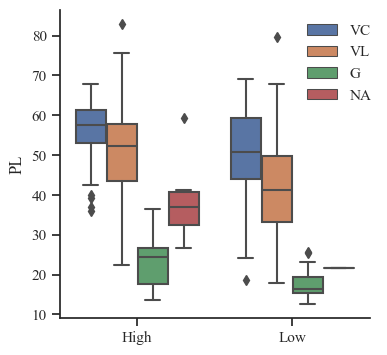

In [29]:
with plt.rc_context():
    sns.set(style="ticks", font_scale=1, rc={'figure.figsize':(4, 4)})

    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    mpl.rcParams['axes.unicode_minus'] = False
    
    box_ax = sns.boxplot(data=data_for_plot, x="PSugar_type", y="HZ-PL", hue="Type", showfliers = True,
                          hue_order=["VC", "VL", "G", "NA"],
                        boxprops={'alpha': 1})
    box_ax.set(xlabel="", ylabel="PL")
    box_ax.spines.right.set_visible(False)
    box_ax.spines.top.set_visible(False)

    box_ax.legend(bbox_to_anchor=(1.05, 1), frameon=False)

    plt.savefig(os.path.join(FIG_PATH, "fig_3_PL_PSugar_value.pdf"), format="pdf", bbox_inches="tight", transparent=True)